# Euler

The Euler solver is the easiest one to implement.

Assume you have to solve a system of s differential equations

$$
\dfrac{d\vec{y}}{dt}=f(\vec{y},t)
$$

where $\vec{y}=(y_{1},y_{2},...,y_{s})$, with $\vec{y}(0)=\vec{y}_{0}$, for $t \in [0,1]$. 
Then, starting from t=0, we find the next point by

$$
\vec{y}_{1}=\vec{y}_{0}+\dfrac{d\vec{y}}{dt}\Big|_{t=0} \times \delta t =
\vec{y}_{0}+f(\vec{y}_{0},0) \times \delta t,
$$

with  $\delta t$ some small step. In the object Euler below, I ask the solver to do this, 
but instead of $\delta t$ I pass the number of steps (N) as an input. The number of steps 
and the stepsize are related since $(N-1) \delta t =1 \Rightarrow \delta t =\dfrac{1}{N-1} $.


In [1]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
# %matplotlib widget

import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [2]:
class Euler:
    '''
    Euler solver for system of differential equations in the interval [0,1].
    call it as Euler(N,init_cond,diffeq).
    
    N= number of steps to take
    
    init_cond= initial condition, y(0)
    
    diffeq= differential equation instance of an object with attribute dydt(y,t), the
    equation to be solved.
    '''
    
    def __init__(self,diffeq,init_cond,N):
        self.step_number=N
        self.step_size=1./(N-1.)#constant step size.
        self.dydt=diffeq#the differential equation to be integrated

        self.number_of_eqs=diffeq.n_eqs#number of equations. It is an attribute of the system (define the system as an object)
        
        self.steps=[0 for i in range(N)]#list of steps, ie t
        
        #initiate list of solutions for every t, ie y^(i)_{n}
        self.solution=[0 for i in range(self.number_of_eqs)]
        for eq_i in range(self.number_of_eqs):
            self.solution[eq_i]=[0 for i in range(N)]
            
        for eq_i in range(self.number_of_eqs):
            self.solution[eq_i][0]=init_cond[eq_i]#the first step is the initial condition
        
        self.current_step=0#initiate a counter (when this becomes equal to N, the solver terminates)
        
        self.end=False# to be changed to True when self.current_step=N
        
        self.y0=[0 for i in range(self.number_of_eqs)]#this is initiated to hold current steps
        
        
    
    def next_step(self):
        '''
        Take the next step.
        for Euler this is:
        y_{n}=y_{n-1}+h*dydt(y_{n-1},t_{n-1})
        '''
        if self.current_step>=self.step_number-1:
            self.end=True 
        else:
            self.current_step+=1
            t0=self.current_step*self.step_size
            self.steps[self.current_step]=t0
            
            
            for eq_i in range(self.number_of_eqs):
                self.y0[eq_i]=self.solution[eq_i][self.current_step-1]
                
            for eq_i in range(self.number_of_eqs):
                self.solution[eq_i][self.current_step]=self.solution[eq_i][self.current_step-1] \
                + self.dydt(self.y0,t0)[eq_i]*self.step_size
                
            
    def solve(self):
        '''
        Run  next_step until self.end becomes True.
        '''
        while not self.end:
            self.next_step()
    

In [3]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [4]:
class diff_eq:
    def __init__(self,n=1):
        self.n_eqs=n
        
        
    def __call__(self,y,t):#to avoid passing function as an argument you can just overload the operator "()".
        
        return [-20*y[0]*t**3,
                5*y[0]*t**2+2*(-y[1]**2+y[2]**2)*t,  
                15*y[0]*t**2+2*(y[1]**2-y[2]**2)*t ]

    
dydt=diff_eq(3)

in0=[5,10,0]
sol1=Euler(dydt,in0,50)
sol2=Euler(N=10000,init_cond=in0,diffeq=dydt)


In [5]:
sol1.solve()
sol2.solve()

# f1=open('y1_py.dat','w')
# f2=open('y2_py.dat','w')
# t=open('t_py.dat','w')

# for i,tt in enumerate(sol2.steps):
#     f1.write(str(sol2.solution[0][i])+'\n')
#     f2.write(str(sol2.solution[1][i])+'\n')
#     t.write(str(tt)+'\n')
# f1.close()    
# f2.close()
# t.close()

<IPython.core.display.Javascript object>


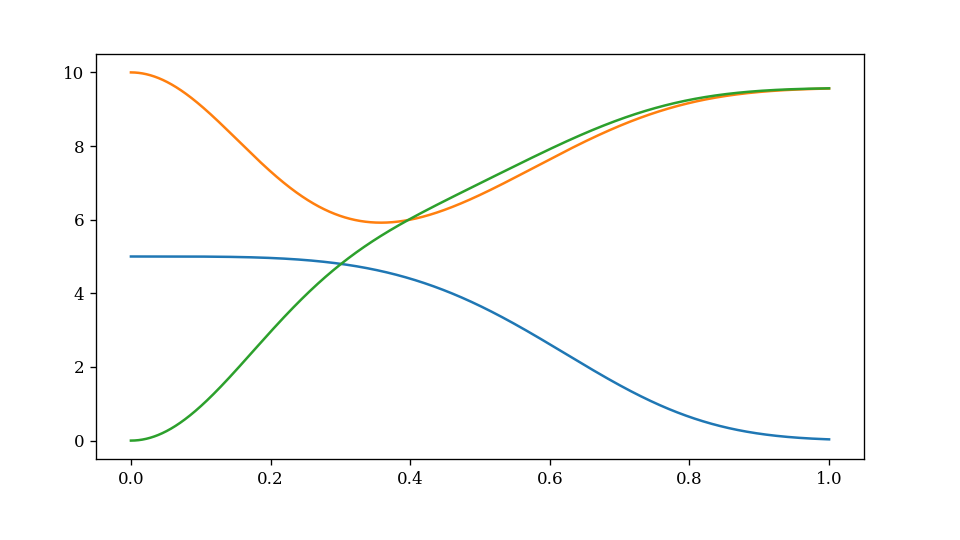

In [6]:
fig=plt.figure(figsize=(8,4.5))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.5)
fig.suptitle('')


sub = fig.add_subplot(111)
# for i in range(len(sol1.solution)):
#     sub.plot(sol1.steps,sol1.solution[i],linestyle='--',linewidth=3)

for i in range(len(sol2.solution)):
    sub.plot(sol2.steps,sol2.solution[i],linestyle='-')
plt.show()